# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Masoud Rahimi
2.   Student Number: 400206249


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [2]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [4]:
dataset = pd.read_csv("/content/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

#clean dataset 
dataset = dataset.drop("Unnamed: 0", axis=1)
#clean_dataset
data_len = len(dataset)

dataset = dataset.values
index_shuffle = np.random.choice(data_len, data_len, replace=False)
size = int(0.8 * data_len) # train size
data_set = dataset[index_shuffle]
x_train = data_set[:size, 0][:, np.newaxis]
y_train = data_set[:size, 1][:, np.newaxis]
x_test = data_set[size:, 0][:, np.newaxis]
y_test = data_set[size:, 1][:, np.newaxis]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [5]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
lx = len(x_train)
A = np.concatenate((x_train, np.ones((lx, 1))), axis=1)
A_temp = np.linalg.pinv(np.dot(A.T,A))
m = A_temp @ A.T @ y_train

In [6]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")


MSE train error: 0.33156113054799397
MSE test error: 0.3281328507962577


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

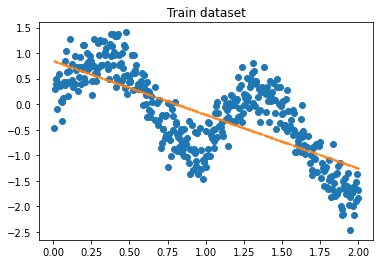

In [7]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

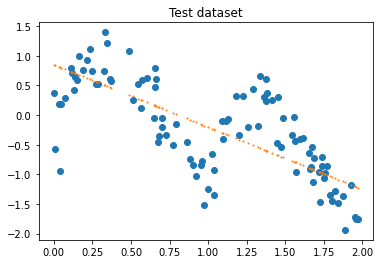

In [8]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

data domain is about to between (-2.5,1.5) (y) . so MSE error on train and test sets seem to be not acceptable
as the plot is drawn the data distribution is not linear. the average-data decrease when moving forward in x-axis (as moving average line shows)

the problem is with linear equation, we can not find the data relation. the data seems to be from different distribution (maybe polynomial)


### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

yes . because it gives more attention to given data that are near to x-axis than which are more far away and it is non-parametric

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [9]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-np.dot((xi-the_query_point).T,(xi-the_query_point)/(2*hyperparameter**2)))
    return W



Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [10]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.hstack((query_x, 1))
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.dot(np.linalg.pinv(X.T @ W @ X),(X.T @ W @ train_Y))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [11]:
hyperparameter = 0.01 #should be set before assign
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = np.array(predicted_test)[:,0]
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.10973390376585612


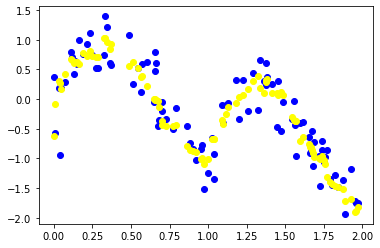

In [12]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

yes. as mentioned before, this method cares more about closer points to the query points and learn a better function (but it is local)

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

i think becuase it try to predict locally new point and it is non-linear approximation it could work good (i think like the Locally Weighted Linear Regression)

### Part10:
Implementing the `KNN model`.

In [13]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y
    def distance(self, x1, x2):
        distance = np.linalg.norm(x1 - x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distance_from_all_point = [self.distance(x, p) for p in self.X] #x distance from all point
        for_list = enumerate(distance_from_all_point)
        distance_from_all_point_sorted = sorted(for_list, key=lambda x:x[1])
        indices_sorted = [i[0] for i in distance_from_all_point_sorted] #indices array 
        indices = indices_sorted[:self.k] #K nearest neighbours indices
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        nearest_value = self.Y[neareest_indices]
        predicted_y = np.mean(nearest_value)
        return predicted_y



In [14]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    y_had = np.array(predicted_y)
    error = mean_squared_error(y_test, y_had)
    return error, predicted_y

In [15]:
k = 8 #i test with different Ks
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.10772011051127846


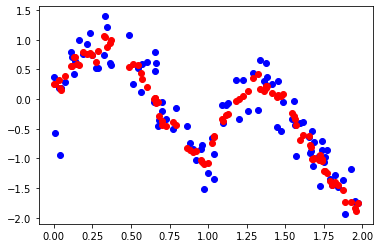

In [16]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="red")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

yes. but as i said before we didnt so much difference with Locally Weighted Linear Regression and their accuracies are close